
**Unsupervised Learning : Fund Allocation For Countries in Need**




**Aim**

*   To cluster countries based on numerical features.

*   It is an Unsupervised Learning problem statement.



**Dataset Attributes**  
**country** : Name of the country  
**child_mort** : Death of children under 5 years of age per 1000 live births  
**exports** : Exports of goods and services per capita. Given as %age of the GDP per capita   
**health** : Total health spending per capita. Given as %age of GDP per capita  
**imports** : Imports of goods and services per capita. Given as %age of the GDP per capita  
**Income** : Net income per person   
**Inflation** : The measurement of the annual growth rate of the Total GDP  
**life_expec** : The average number of years a new born child would live if the current mortality patterns are to rem...  
**total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain th...  
**gdpp**: The GDP per capita. Calculated as the Total GDP divided by the total population.  
**Notebook Contents**  
*   Dataset Information

*   Exploratory Data Analysis (EDA)

*   Feature Engineering

*   Modeling

*   Conclusion

**What you will learn**

*  Data Visualization techniques.
*   Feature Engineering & PCA.
*   K-Means Clustering model performance.
*   Clustering analysis for deciom making


**Import preliminary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('country.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Check for shape
df.shape

(167, 10)

In [5]:
# Check for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [18]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Exploratory Data Analysis**

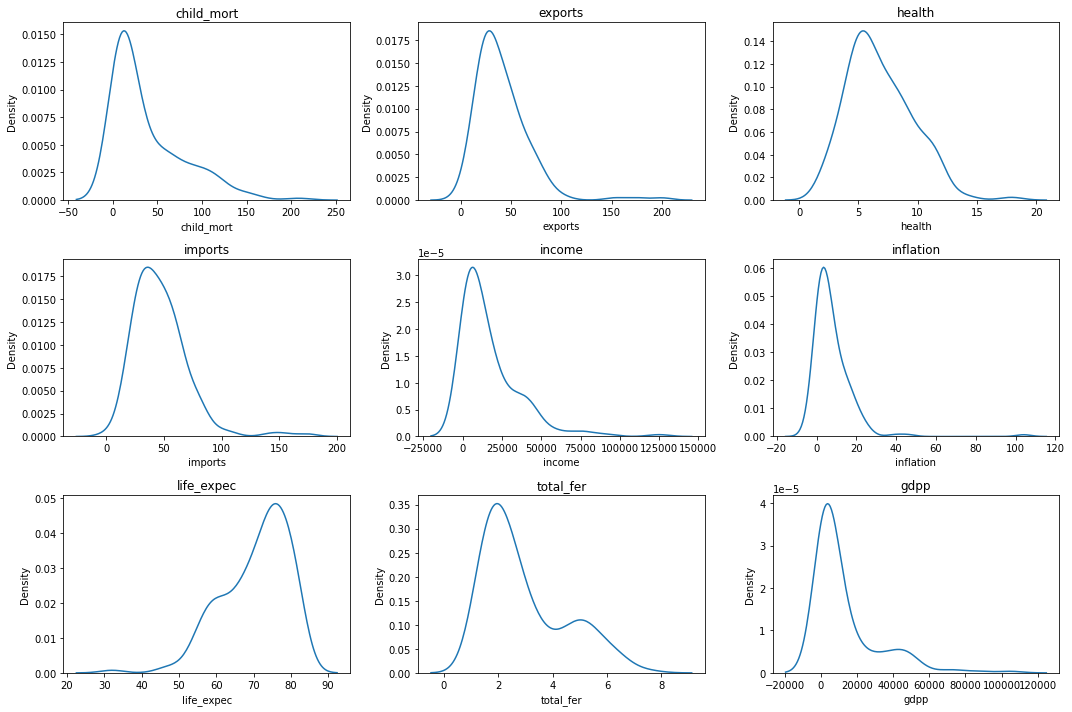

In [19]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create a subplot grid with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Plot the KDE subplot distribution for each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(df[column], ax=ax)
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()



*   life_expec displays a left or negatively skewed data distribution
*   health displays a normally distrubuted data.
*   All the remaining features show a right or positively skewed data distribution.





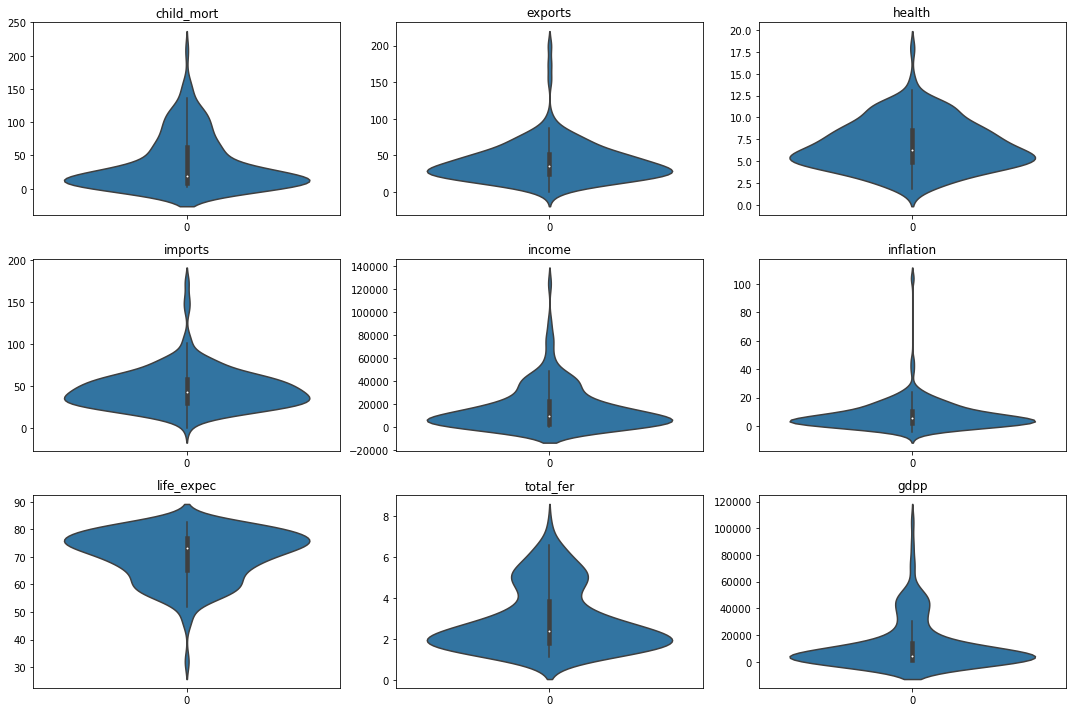

In [20]:
# Create a subplot grid with 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Plot the violin subplot distribution for each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i // 3, i % 3]
    sns.violinplot(data=df[column], ax=ax)
    ax.set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


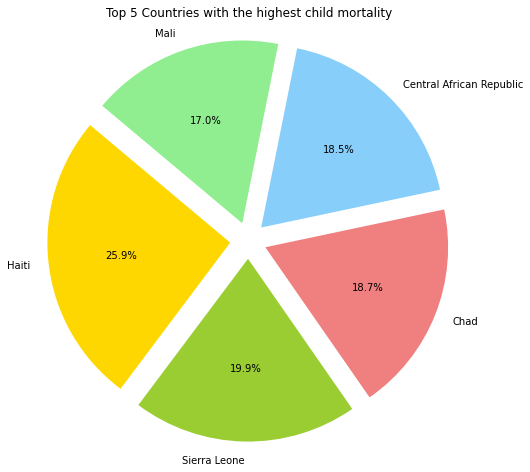

In [21]:
# Group by the top 5 countries with the highest child mortality rate
top_countries = df.nlargest(5, 'child_mort')

# Plotting the 2D pie chart
fig, ax = plt.subplots(figsize=(8, 8))

sizes = top_countries['child_mort']
labels = top_countries['country']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

# explode 1st slice
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ensuring the pie chart is drawn as a circle
ax.axis('equal')

# Adding a title
plt.title('Top 5 Countries with the highest child mortality')

# Show the plot
plt.show()

Haiti recorded percentage of child mortality followed by Mali,Central African Republic,Chad and Sierra Leone

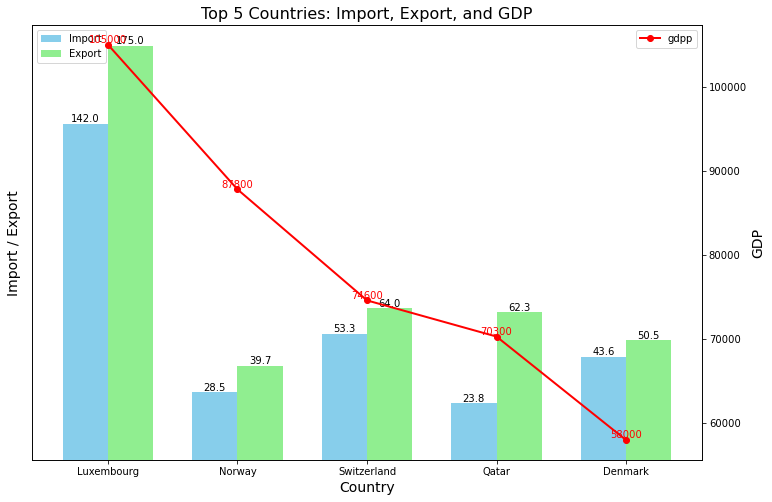

In [22]:
# Group by the top 5 countries based on GDP
top_countries = df.nlargest(5, 'gdpp')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for import and export
bar_width = 0.35
x = range(len(top_countries))

bars1 = ax1.bar([p - bar_width/2 for p in x], top_countries['imports'], width=bar_width, label='Import', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], top_countries['exports'], width=bar_width, label='Export', color='lightgreen')

# Add data labels on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Line plot for GDP
ax2 = ax1.twinx()
ax2.plot(top_countries['country'], top_countries['gdpp'], label='gdpp', color='red', marker='o', linewidth=2)

# Add data labels for the GDP line plot
for i, value in enumerate(top_countries['gdpp']):
    ax2.text(i, value, f'{value}', ha='center', va='bottom', color='red')

# Setting the labels and title
ax1.set_title('Top 5 Countries: Import, Export, and GDP', fontsize=16)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Import / Export', fontsize=14)
ax2.set_ylabel('GDP', fontsize=14)

# Removing y-axis labels for ax1
ax1.set_yticklabels([])
ax1.tick_params(axis='y', which='both', left=False)

# Setting x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(top_countries['country'])

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

Luxembourg has export more than import and they have the highest GDP.Norway export more than import making them having a significant higher GDP so at the rest of the countries namely Switzerland,Qatar and Denmark.

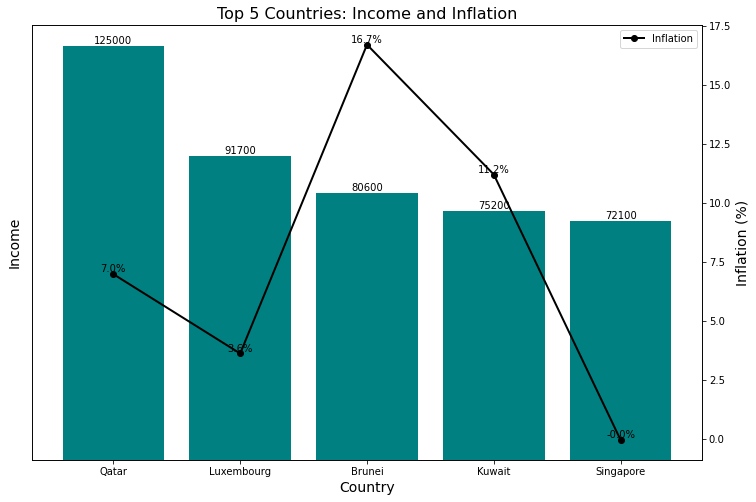

In [23]:
# Group by the top 5 countries based on income
top_countries = df.nlargest(5, 'income')

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for income
bars = ax1.bar(top_countries['country'], top_countries['income'], color='teal')

# Add data labels on the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Line plot for inflation
ax2 = ax1.twinx()
ax2.plot(top_countries['country'], top_countries['inflation'], label='Inflation', color='black', marker='o', linewidth=2)

# Add data labels for the inflation line plot
for i, value in enumerate(top_countries['inflation']):
    ax2.text(i, value, f'{value:.1f}%', ha='center', va='bottom', color='black')

# Setting the labels and title
ax1.set_title('Top 5 Countries: Income and Inflation', fontsize=16)
ax1.set_xlabel('Country', fontsize=14)
ax1.set_ylabel('Income', fontsize=14)
ax2.set_ylabel('Inflation (%)', fontsize=14)

# Removing y-axis labels for ax1
ax1.set_yticklabels([])
ax1.tick_params(axis='y', which='both', left=False)

# Adding legends
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In order,Qatar,Luxembourg,Brunei,Kuwait and Singapore records the high icome with Brunei,Kuwait,Qatar,Luxembourg and Singapore in order when it comes to inflation.

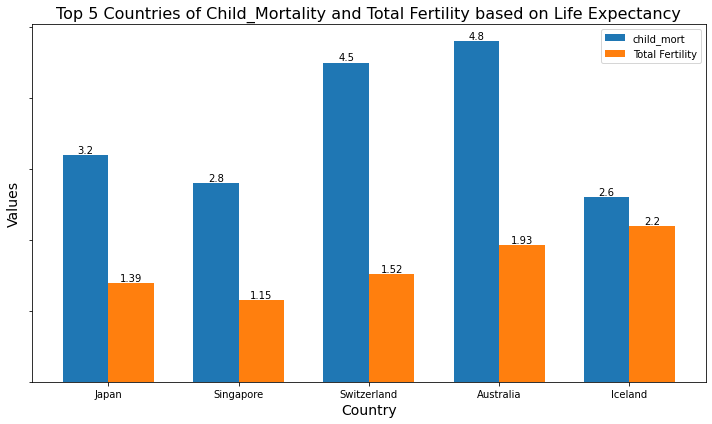

In [24]:
# Group by the top 5 countries based on life_expec (or any other relevant criterion)
top_countries = df.nlargest(5, 'life_expec')

# Extracting data
countries = top_countries['country']
life_expec = top_countries['child_mort']
total_fer = top_countries['total_fer']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths
bar_width = 0.35
x = range(len(countries))

# Plotting bars
bars1 = ax.bar([p - bar_width/2 for p in x], life_expec, width=bar_width, label='child_mort')
bars2 = ax.bar([p + bar_width/2 for p in x], total_fer, width=bar_width, label='Total Fertility')


# Adding data labels on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Top 5 Countries of Child_Mortality and Total Fertility based on Life Expectancy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

# Removing y-axis labels
ax.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

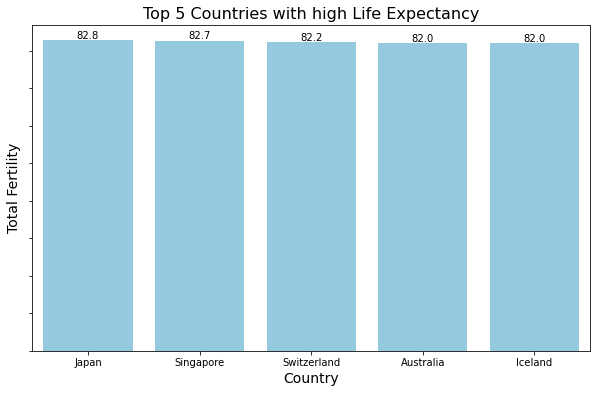

In [25]:
# Group by the top 5 countries based on life_expec
top_countries = df.nlargest(5, 'life_expec')

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='life_expec', data=top_countries, color='skyblue')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Setting the labels and title
plt.title('Top 5 Countries with high Life Expectancy', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Fertility', fontsize=14)

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Show the plot
plt.show()

life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.
None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.
African countries are again present in the lower end for another feature.

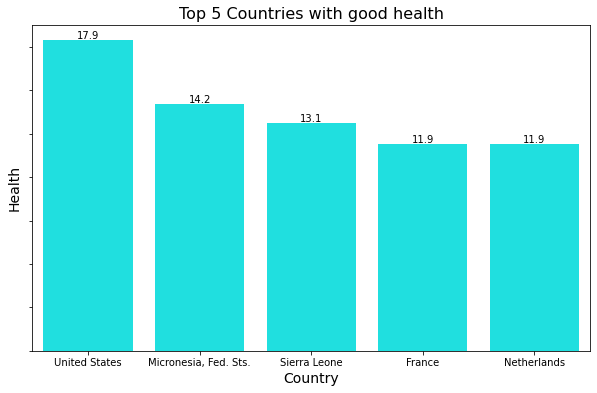

In [26]:
# Group by the top 5 countries based on health
top_countries = df.nlargest(5, 'health')

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='health', data=top_countries, color='aqua')

# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Setting the labels and title
plt.title('Top 5 Countries with good health', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Health', fontsize=14)

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Show the plot
plt.show()

United States stands at the top when it comes to spending on health with 17% of the individual GDP contribution.
6% seems to be the mean values of the citizens spending on their health.
Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.

**Feature Engineering**

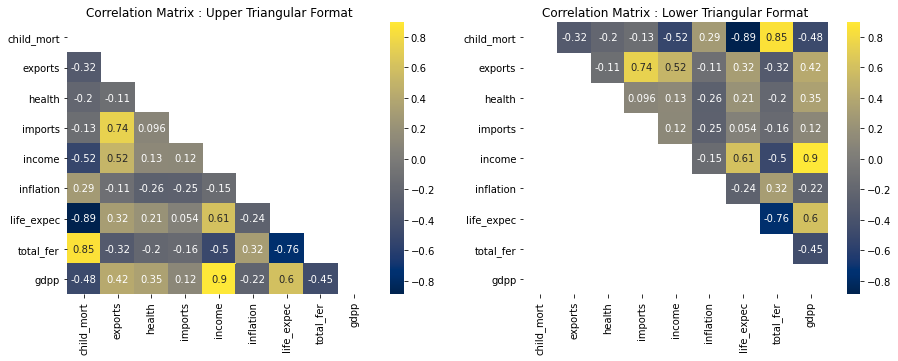

In [27]:
# Select only numeric columns for correlation calculation
ut = np.triu(be.corr())
lt = np.tril(be.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(be.corr(),cmap = 'cividis',annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(be.corr(),cmap = 'cividis',annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');


**Data Scaling**  
It is performed to normalize the data

In [11]:
be = df.drop('country', axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
X = be

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
be

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


**Principal Component Analysis (PCA)** :  
It is a dimension reduction method that used to add up the variances of all the features in cummulative format,typically eigen values with more than 95% of ratio of variance are selected.They correspond to the columns of the PCA generated dataframe.

In [29]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 or 3 components 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame for better readability
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

**Modeling**  
**Unsupervised Learning** : It is a problem where the target variable / feature is unknown. Unsupervised Learning problems widely occur in medical domain where mutliple readings are taken and the underlying diseases are unknown.
Thus, searching for patterns by using visualization techniques provides us with some underlying insight that cannot be understood by staring into the tabular data.
However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards the algorithmic approach.

K-Means Clustering  
**K-Means Clustering** is a distance based algorithm that is used for unsupervised learning that does not support categorical features.

It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters the in data but with a mathematical approach :  
Selects 2 (assume k = 2) centroids randomly.  
Distance between the centroids and all the data points are calculated.  
If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.  
For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.  
This process repeats itself untill both centroids converge to fixed points.  
**k hyperparameter** : It defines the number of clusters or groups the data is to be divided into. For the selection of values of k, we use 2 statistical tests :  
Elbow Method : It is a method that plots the sum of squared error for a range of values of k. If this plot looks like an arm, then k is the value that resembles an elbow is selected. From this elbow value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.  
Silhouette Score Method : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the k value with highest score is selected for modeling.

In [30]:
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)  
clusters = kmeans.fit_predict(df_pca)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

In [31]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


**Elbow Method & Silhouette Score Method**

In [32]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X_pca,clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.4424972238276243


**Scatter plot for the 3 clusters**

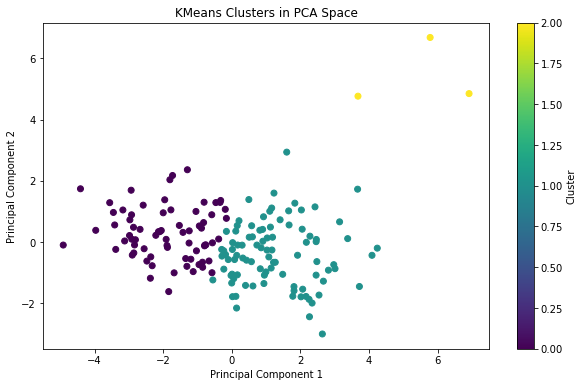

In [38]:
# Visualize the clusters in the PCA space
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters in PCA Space')
plt.colorbar(label='Cluster')
plt.show()

**Analysis for Cluster 0**

In [39]:
# Filter the DataFrame to get all countries in cluster 0
cluster_0 = df[df['cluster'] == 0]

# Print the list of countries in cluster 0
print(cluster_0[['country','child_mort', 'health', 'exports', 'imports','income','inflation','life_expec','total_fer','gdpp']])

         country  child_mort  health  exports  imports  income  inflation  \
0    Afghanistan        90.2    7.58     10.0     44.9    1610      9.440   
3         Angola       119.0    2.85     62.3     42.9    5900     22.400   
12    Bangladesh        49.4    3.52     16.0     21.8    2440      7.140   
17         Benin       111.0    4.10     23.8     37.2    1820      0.885   
18        Bhutan        42.7    5.20     42.5     70.7    6420      5.990   
..           ...         ...     ...      ...      ...     ...        ...   
155       Uganda        81.0    9.01     17.1     28.6    1540     10.600   
161   Uzbekistan        36.3    5.81     31.7     28.5    4240     16.500   
162      Vanuatu        29.2    5.25     46.6     52.7    2950      2.620   
165        Yemen        56.3    5.18     30.0     34.4    4480     23.600   
166       Zambia        83.1    5.89     37.0     30.9    3280     14.000   

     life_expec  total_fer  gdpp  
0          56.2       5.82   553  
3    

In [45]:
# Print only the country names in cluster 2
print(cluster_2['country'].tolist())

['Luxembourg', 'Malta', 'Singapore']


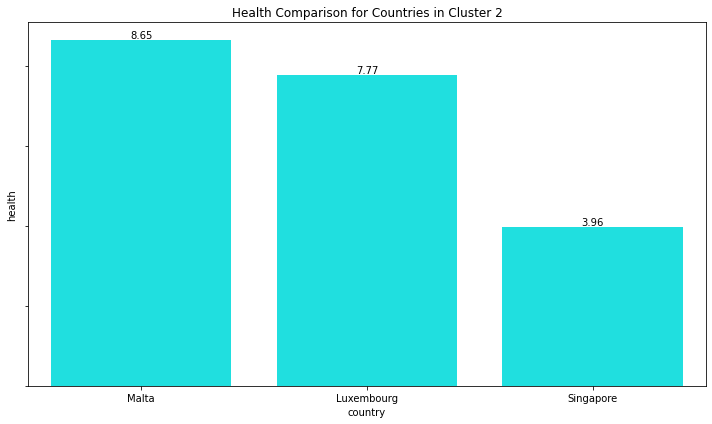

In [46]:
# Filter the DataFrame to get only the 'country' and 'health' columns
cluster_2_health = cluster_2[['country', 'health']]

# Sort the DataFrame by the 'health' column in ascending order
cluster_2_health = cluster_2_health.sort_values(by='health', ascending=False)

# Create a bar chart based on the 'health' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='health', data=cluster_2_health,color='aqua') # Store the axis object

# Add data labels to the chart

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Add a title and adjust layout
plt.title('Health Comparison for Countries in Cluster 2')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()


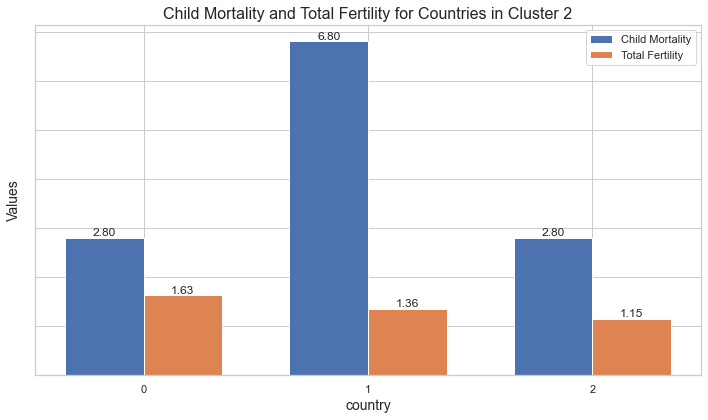

In [53]:
# Filter the DataFrame for cluster 2
cluster_2 = df[df['cluster'] == 2]

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar widths
bar_width = 0.35
x = range(len(cluster_2))

# Extract the data for child mortality and life expectancy for cluster 2
child_mort = cluster_2['child_mort'].tolist()
life_expec = cluster_2['total_fer'].tolist()

# Plotting bars
bars1 = ax.bar([p - bar_width/2 for p in x], child_mort, width=bar_width, label='Child Mortality')
bars2 = ax.bar([p + bar_width/2 for p in x], life_expec, width=bar_width, label='Total Fertility')

# Adding data labels on the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adding labels and title
ax.set_xlabel('country', fontsize=14) # Using 'Country Index' since we're not plotting individual country names
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Child Mortality and Total Fertility for Countries in Cluster 2', fontsize=16)
ax.set_xticks(x)
ax.legend()

# Removing y-axis labels
ax.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()


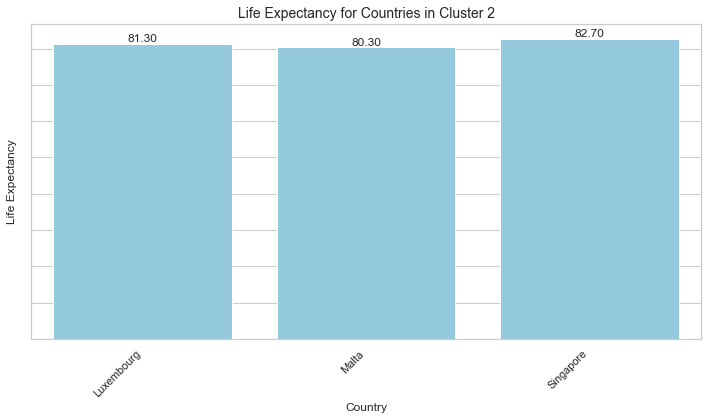

In [49]:
# Filter the DataFrame for cluster 2
cluster_2 = df[df['cluster'] == 2]

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot for life expectancy in cluster 2
ax = sns.barplot(x='country', y='life_expec', data=cluster_2, color='skyblue')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
ax.set_yticklabels([])

# Customize the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Life Expectancy for Countries in Cluster 2', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

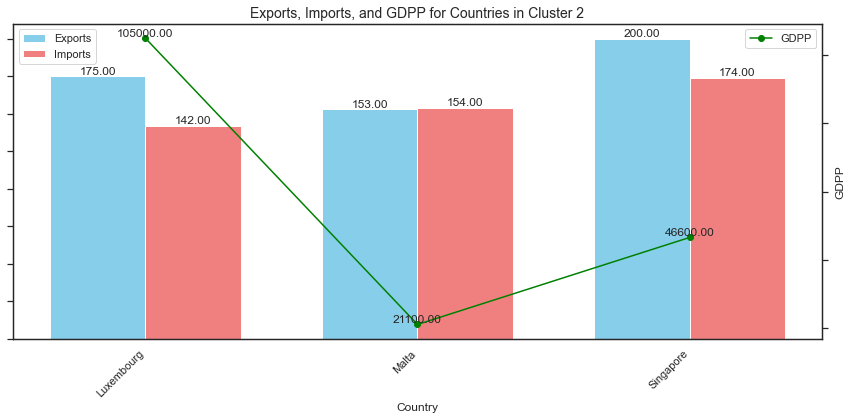

In [51]:
# Filter the DataFrame for cluster 2
cluster_2 = df[df['cluster'] == 2]

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 2
country_names = cluster_2['country'].tolist()
x = range(len(country_names))

# Extract data for exports, imports, and gdpp for cluster 2
exports = cluster_2['exports'].tolist()
imports = cluster_2['imports'].tolist()
gdpp = cluster_2['gdpp'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for exports and imports
bars1 = ax1.bar([p - bar_width/2 for p in x], exports, width=bar_width, label='Exports', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], imports, width=bar_width, label='Imports', color='lightcoral')

# Add data labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Exports, Imports, and GDPP for Countries in Cluster 2', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for gdpp
line = ax2.plot(x, gdpp, color='green', marker='o', label='GDPP')

# Set labels for the line chart
ax2.set_ylabel('GDPP', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, gdpp_value in enumerate(gdpp):
    ax2.text(i, gdpp_value, f'{gdpp_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

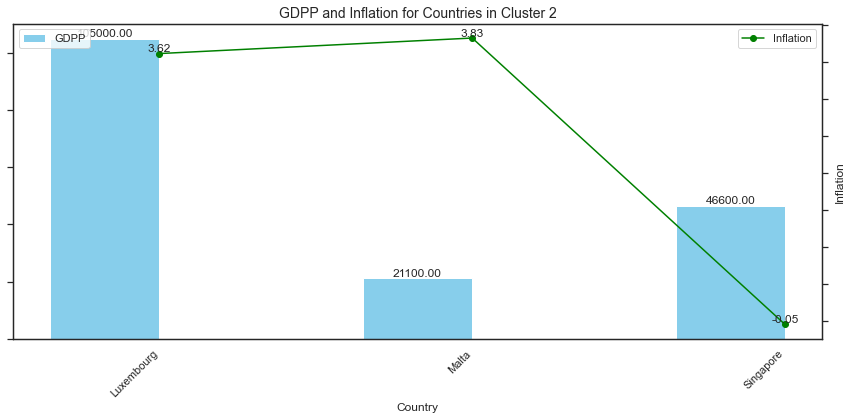

In [54]:
# Filter the DataFrame for cluster 2
cluster_2 = df[df['cluster'] == 2]

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 2
country_names = cluster_2['country'].tolist()
x = range(len(country_names))

# Extract data for gdpp and inflation for cluster 2
gdpp = cluster_2['gdpp'].tolist()
inflation = cluster_2['inflation'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for gdpp
bars1 = ax1.bar([p - bar_width/2 for p in x], gdpp, width=bar_width, label='GDPP', color='skyblue')

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('GDPP and Inflation for Countries in Cluster 2', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for inflation
line = ax2.plot(x, inflation, color='green', marker='o', label='Inflation')

# Set labels for the line chart
ax2.set_ylabel('Inflation', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, inflation_value in enumerate(inflation):
    ax2.text(i, inflation_value, f'{inflation_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()


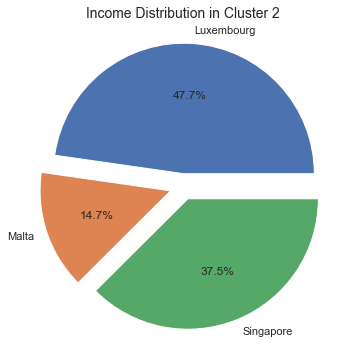

In [55]:
# Filter the DataFrame for cluster 2
cluster_2 = df[df['cluster'] == 2]

# Extract the income data for cluster 2
income = cluster_2['income'].tolist()

# Define labels as the country names in cluster 2
labels = cluster_2['country'].tolist()

# Create explode array to explode all slices (adjust 0.1 as needed for desired spacing)
explode = [0.1] * len(labels)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(income, labels=labels, autopct='%1.1f%%', explode=explode)  # Add explode parameter
plt.title('Income Distribution in Cluster 2', fontsize=14)
plt.show()

**Analysis for Cluster 1**

In [58]:
# Filter the DataFrame to get all countries in cluster 1
cluster_1 = df[df['cluster'] == 1]

# Print the list of countries in cluster 1
print(cluster_1[['country','child_mort', 'health', 'exports', 'imports','income','inflation','life_expec','total_fer','gdpp']])

                 country  child_mort  health  exports  imports  income  \
1                Albania        16.6    6.55     28.0     48.6    9930   
2                Algeria        27.3    4.17     38.4     31.4   12900   
4    Antigua and Barbuda        10.3    6.03     45.5     58.9   19100   
5              Argentina        14.5    8.10     18.9     16.0   18700   
6                Armenia        18.1    4.40     20.8     45.3    6700   
..                   ...         ...     ...      ...      ...     ...   
158       United Kingdom         5.2    9.64     28.2     30.8   36200   
159        United States         7.3   17.90     12.4     15.8   49400   
160              Uruguay        10.6    8.35     26.3     25.4   17100   
163            Venezuela        17.1    4.91     28.5     17.6   16500   
164              Vietnam        23.3    6.84     72.0     80.2    4490   

     inflation  life_expec  total_fer   gdpp  
1         4.49        76.3       1.65   4090  
2        16.10   

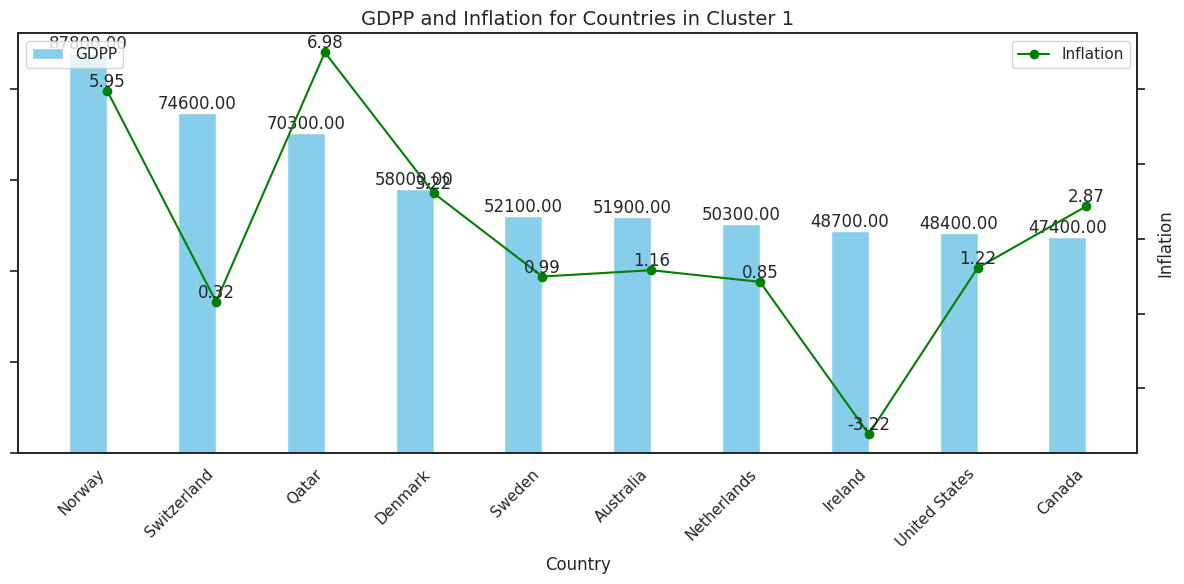

In [111]:
# Filter the DataFrame for cluster 0
cluster_1 = df[df['cluster'] == 1]

# Sort the DataFrame by GDPP in ascending order
cluster_1_sorted = cluster_1.nlargest(10,'gdpp') # Sort the data

# Set the style for the plot (removing grid)
sns.set(style="white")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 1 (now sorted)
country_names = cluster_1_sorted['country'].tolist()
x = range(len(country_names))

# Extract data for gdpp and inflation for cluster 1 (now sorted)
gdpp = cluster_1_sorted['gdpp'].tolist()
inflation = cluster_1_sorted['inflation'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for gdpp
bars1 = ax1.bar([p - bar_width/2 for p in x], gdpp, width=bar_width, label='GDPP', color='skyblue')

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('GDPP and Inflation for Countries in Cluster 1', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for inflation
line = ax2.plot(x, inflation, color='green', marker='o', label='Inflation')

# Set labels for the line chart
ax2.set_ylabel('Inflation', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, inflation_value in enumerate(inflation):
    ax2.text(i, inflation_value, f'{inflation_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

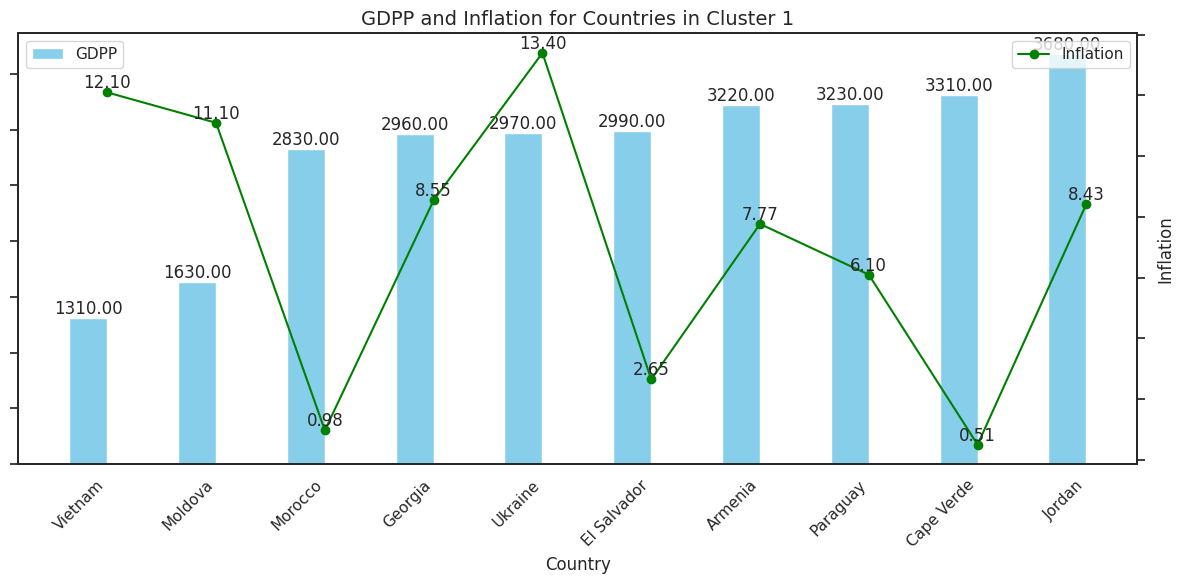

In [114]:
# Filter the DataFrame for cluster 0
cluster_1 = df[df['cluster'] == 1]

# Sort the DataFrame by GDPP in ascending order
cluster_1_sorted = cluster_1.nsmallest(10,'gdpp') # Sort the data

# Set the style for the plot (removing grid)
sns.set(style="white")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 1 (now sorted)
country_names = cluster_1_sorted['country'].tolist()
x = range(len(country_names))

# Extract data for gdpp and inflation for cluster 1 (now sorted)
gdpp = cluster_1_sorted['gdpp'].tolist()
inflation = cluster_1_sorted['inflation'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for gdpp
bars1 = ax1.bar([p - bar_width/2 for p in x], gdpp, width=bar_width, label='GDPP', color='skyblue')

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('GDPP and Inflation for Countries in Cluster 1', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for inflation
line = ax2.plot(x, inflation, color='green', marker='o', label='Inflation')

# Set labels for the line chart
ax2.set_ylabel('Inflation', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, inflation_value in enumerate(inflation):
    ax2.text(i, inflation_value, f'{inflation_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

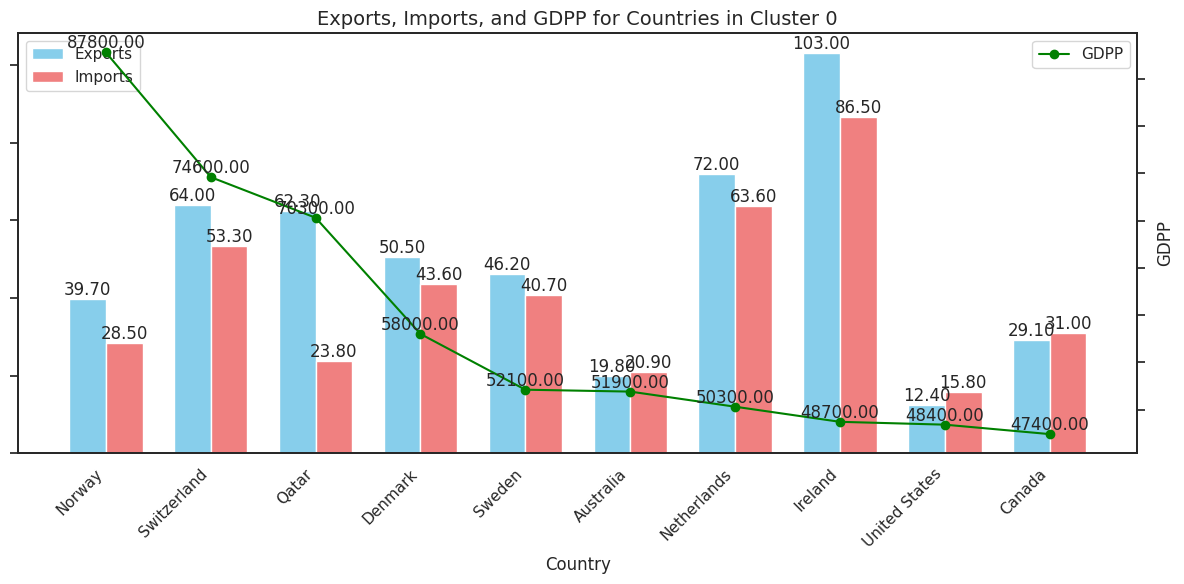

In [125]:
# Filter the DataFrame for cluster 0
cluster_1 = df[df['cluster'] == 1].nlargest(10, 'gdpp')

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 0
country_names = cluster_1['country'].tolist()
x = range(len(country_names))

# Extract data for exports, imports, and gdpp for cluster 0
exports = cluster_1['exports'].tolist()
imports = cluster_1['imports'].tolist()
gdpp = cluster_1['gdpp'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for exports and imports
bars1 = ax1.bar([p - bar_width/2 for p in x], exports, width=bar_width, label='Exports', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], imports, width=bar_width, label='Imports', color='lightcoral')

# Add data labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Exports, Imports, and GDPP for Countries in Cluster 0', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for gdpp
line = ax2.plot(x, gdpp, color='green', marker='o', label='GDPP')

# Set labels for the line chart
ax2.set_ylabel('GDPP', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, gdpp_value in enumerate(gdpp):
    ax2.text(i, gdpp_value, f'{gdpp_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

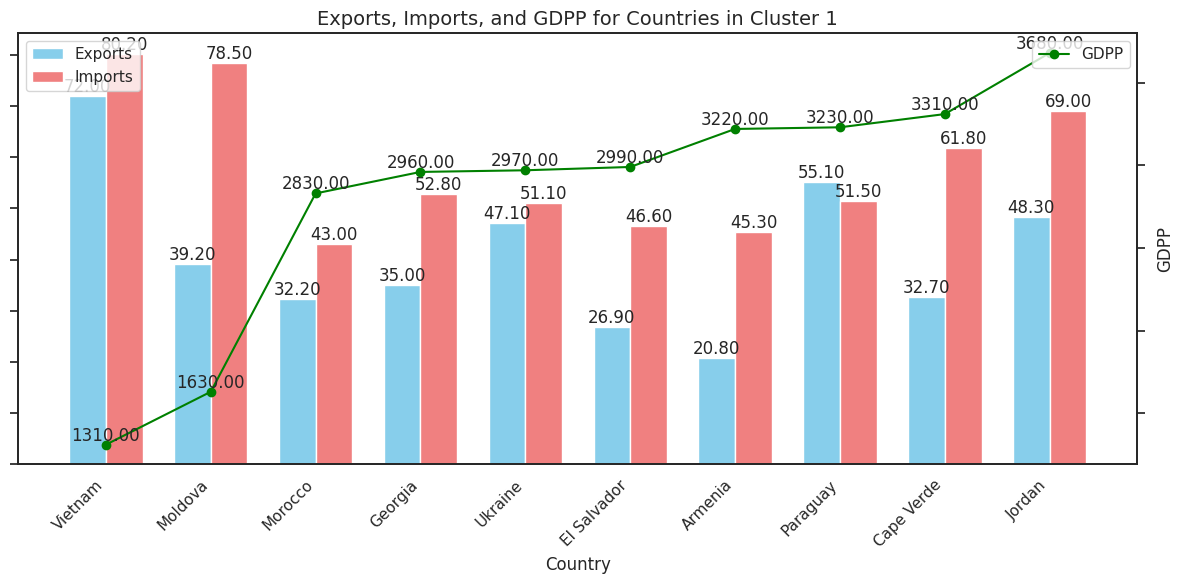

In [127]:
# Filter the DataFrame for cluster 0
cluster_1 = df[df['cluster'] == 1].nsmallest(10, 'gdpp')

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 0
country_names = cluster_1['country'].tolist()
x = range(len(country_names))

# Extract data for exports, imports, and gdpp for cluster 0
exports = cluster_1['exports'].tolist()
imports = cluster_1['imports'].tolist()
gdpp = cluster_1['gdpp'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for exports and imports
bars1 = ax1.bar([p - bar_width/2 for p in x], exports, width=bar_width, label='Exports', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], imports, width=bar_width, label='Imports', color='lightcoral')

# Add data labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Exports, Imports, and GDPP for Countries in Cluster 1', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for gdpp
line = ax2.plot(x, gdpp, color='green', marker='o', label='GDPP')

# Set labels for the line chart
ax2.set_ylabel('GDPP', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, gdpp_value in enumerate(gdpp):
    ax2.text(i, gdpp_value, f'{gdpp_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

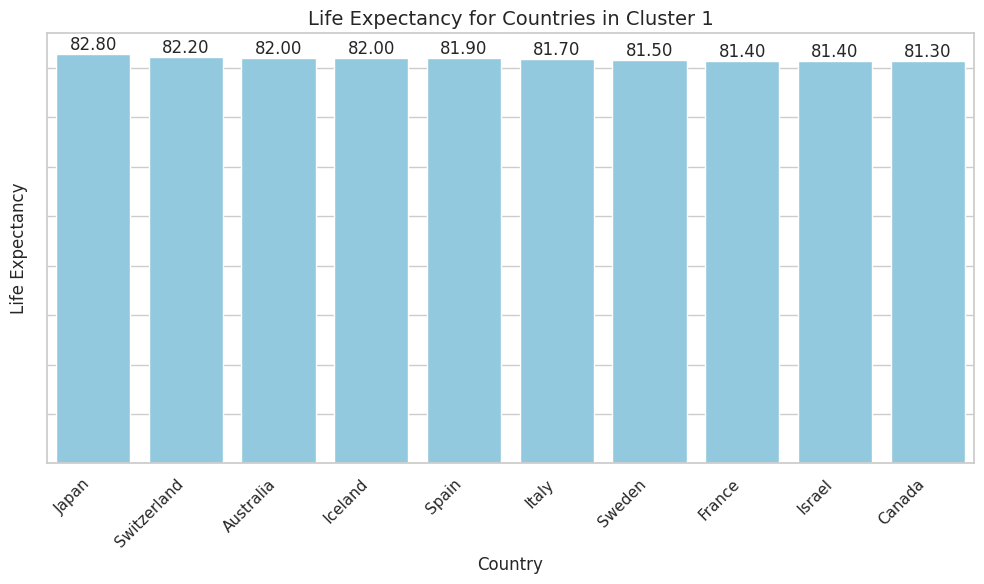

In [123]:
# Filter the DataFrame for the top 10 countries in cluster 1
cluster_1 = df[df['cluster'] == 1].nlargest(10, 'life_expec')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot for life expectancy in cluster 1
ax = sns.barplot(x='country', y='life_expec', data=cluster_1, color='skyblue')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
ax.set_yticklabels([])

# Customize the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Life Expectancy for Countries in Cluster 1', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

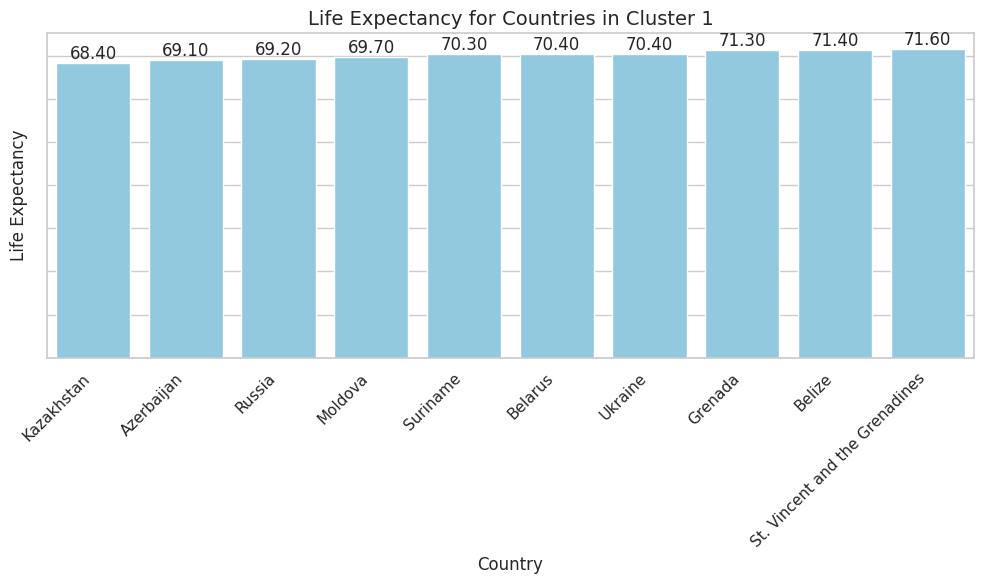

In [124]:
# Filter the DataFrame for the top 10 countries in cluster 1
cluster_1 = df[df['cluster'] == 1].nsmallest(10, 'life_expec')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))

# Create a bar plot for life expectancy in cluster 1
ax = sns.barplot(x='country', y='life_expec', data=cluster_1, color='skyblue')

# Add data labels to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
ax.set_yticklabels([])

# Customize the plot
plt.xlabel('Country', fontsize=12)
plt.ylabel('Life Expectancy', fontsize=12)
plt.title('Life Expectancy for Countries in Cluster 1', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<ipython-input-131-807f7b1f7674>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels


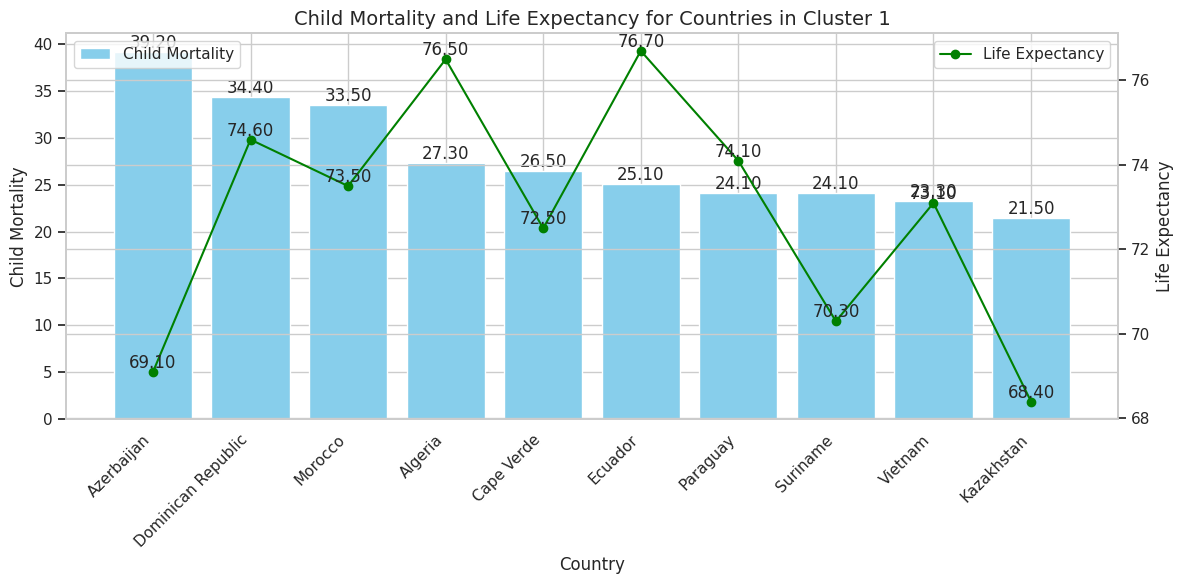

In [131]:
# Filter the DataFrame for cluster 0 and get the 10 countries with highest child mortality
cluster_1 = df[df['cluster'] == 1].nlargest(10,'child_mort')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size for better label visibility

# Get the country names in cluster 1 (now sorted)
country_names = cluster_1['country'].tolist()

# Extract the data for child mortality and life expectancy for cluster 0
child_mort = cluster_1['child_mort'].tolist()
life_expec = cluster_1['life_expec'].tolist()

# Plot bars for child mortality
bars1 = ax1.bar(country_names, child_mort, label='Child Mortality', color='skyblue')  # Use country names directly

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Child Mortality and Life Expectancy for Countries in Cluster 1', fontsize=14)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels
ax1.legend(loc='upper left')
ax1.set_ylabel('Child Mortality', fontsize=12)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for life expectancy
line = ax2.plot(country_names, life_expec, color='green', marker='o', label='Life Expectancy')  # Use country names directly

# Set labels for the line chart
ax2.set_ylabel('Life Expectancy', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, life_expec_value in enumerate(life_expec):
    ax2.text(country_names[i], life_expec_value, f'{life_expec_value:.2f}', ha='center', va='bottom')  # Use country names for x-position

# Show plot
plt.tight_layout()
plt.show()

<ipython-input-132-37711c98fb2b>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels


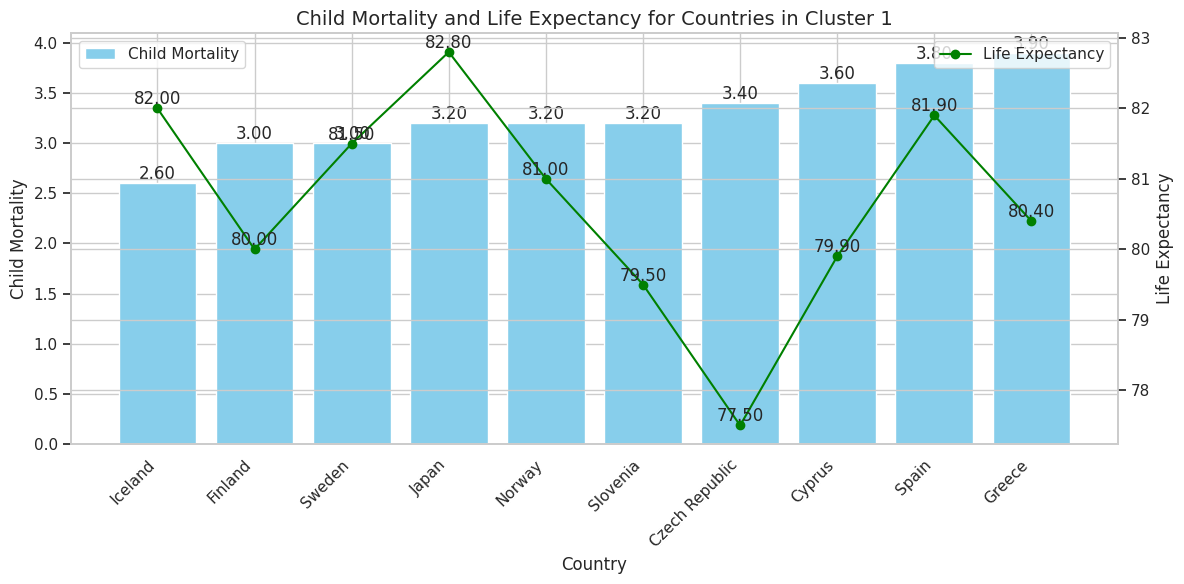

In [132]:
# Filter the DataFrame for cluster 0 and get the 10 countries with highest child mortality
cluster_1 = df[df['cluster'] == 1].nsmallest(10,'child_mort')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size for better label visibility

# Get the country names in cluster 1 (now sorted)
country_names = cluster_1['country'].tolist()

# Extract the data for child mortality and life expectancy for cluster 0
child_mort = cluster_1['child_mort'].tolist()
life_expec = cluster_1['life_expec'].tolist()

# Plot bars for child mortality
bars1 = ax1.bar(country_names, child_mort, label='Child Mortality', color='skyblue')  # Use country names directly

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Child Mortality and Life Expectancy for Countries in Cluster 1', fontsize=14)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels
ax1.legend(loc='upper left')
ax1.set_ylabel('Child Mortality', fontsize=12)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for life expectancy
line = ax2.plot(country_names, life_expec, color='green', marker='o', label='Life Expectancy')  # Use country names directly

# Set labels for the line chart
ax2.set_ylabel('Life Expectancy', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, life_expec_value in enumerate(life_expec):
    ax2.text(country_names[i], life_expec_value, f'{life_expec_value:.2f}', ha='center', va='bottom')  # Use country names for x-position

# Show plot
plt.tight_layout()
plt.show()

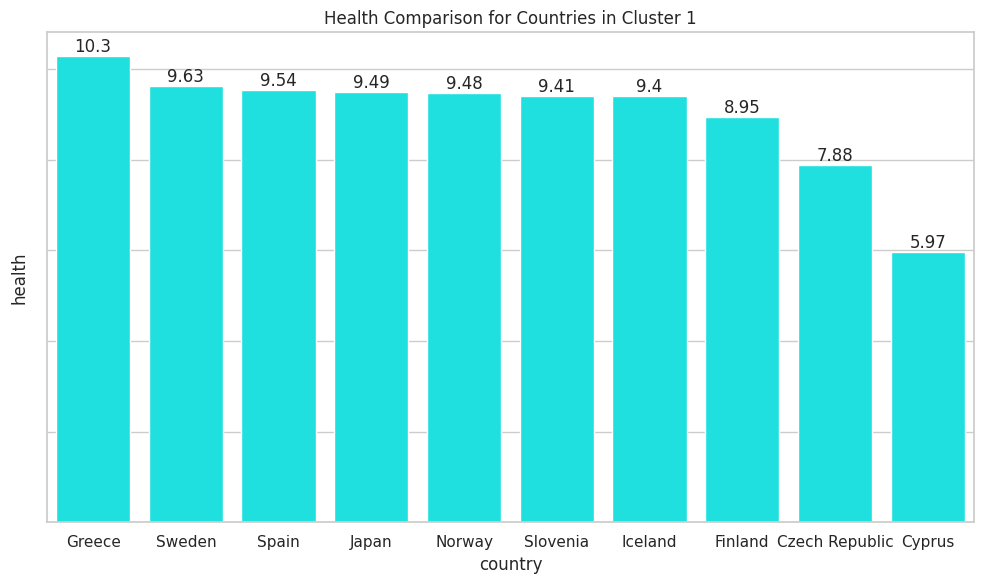

In [138]:
# Filter the DataFrame to get only the 'country' and 'health' columns
cluster_1_health = cluster_1[['country', 'health']].nsmallest(10,'health')

# Sort the DataFrame by the 'health' column in ascending order
cluster_1_health = cluster_1_health.sort_values(by='health', ascending=False)

# Create a bar chart based on the 'health' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='health', data=cluster_1_health,color='aqua') # Store the axis object

# Add data labels to the chart

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Add a title and adjust layout
plt.title('Health Comparison for Countries in Cluster 1')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [26]:
# Print only the country names in cluster 1
print(cluster_1['country'].tolist())

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'St. Vincent and the Grenadines', 'Suriname', 'Sweden'

**Analysis for Cluster 0**

In [59]:
# Filter the DataFrame to get all countries in cluster 0
cluster_0 = df[df['cluster'] == 0]

# Print the list of countries in cluster 2
print(cluster_0[['country','child_mort', 'health', 'exports', 'imports','income','inflation','life_expec','total_fer','gdpp']])

         country  child_mort  health  exports  imports  income  inflation  \
0    Afghanistan        90.2    7.58     10.0     44.9    1610      9.440   
3         Angola       119.0    2.85     62.3     42.9    5900     22.400   
12    Bangladesh        49.4    3.52     16.0     21.8    2440      7.140   
17         Benin       111.0    4.10     23.8     37.2    1820      0.885   
18        Bhutan        42.7    5.20     42.5     70.7    6420      5.990   
..           ...         ...     ...      ...      ...     ...        ...   
155       Uganda        81.0    9.01     17.1     28.6    1540     10.600   
161   Uzbekistan        36.3    5.81     31.7     28.5    4240     16.500   
162      Vanuatu        29.2    5.25     46.6     52.7    2950      2.620   
165        Yemen        56.3    5.18     30.0     34.4    4480     23.600   
166       Zambia        83.1    5.89     37.0     30.9    3280     14.000   

     life_expec  total_fer  gdpp  
0          56.2       5.82   553  
3    

In [60]:
# Print only the country names in cluster 0
print(cluster_0['country'].tolist())

['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']


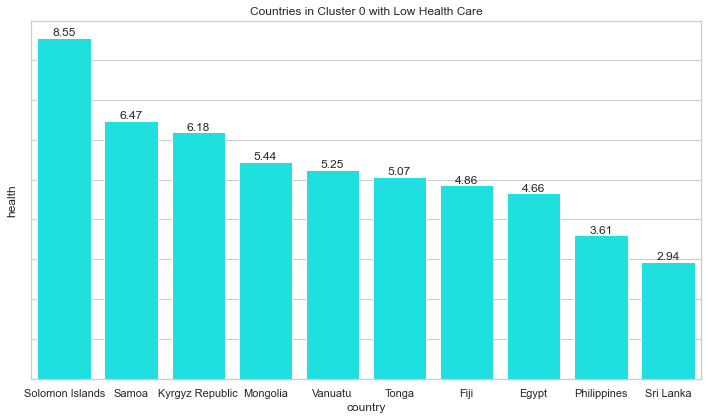

In [70]:
# Filter the DataFrame to get only the 'country' and 'health' columns
cluster_0_health = cluster_0[['country', 'health']].nsmallest(10,'health')

# Sort the DataFrame by the 'health' column in ascending order
cluster_0_health = cluster_0_health.sort_values(by='health', ascending=False)

# Create a bar chart based on the 'health' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='health', data=cluster_0_health,color='aqua') # Store the axis object

# Add data labels to the chart

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Add a title and adjust layout
plt.title('Countries in Cluster 0 with Low Health Care')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

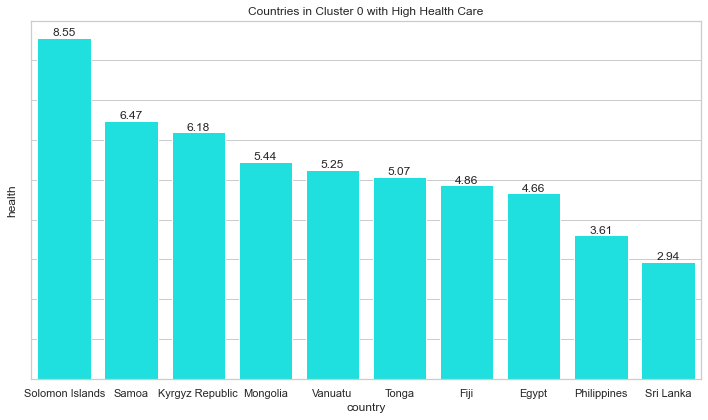

In [71]:
# Filter the DataFrame to get only the 'country' and 'health' columns
cluster_0_health = cluster_0[['country', 'health']].nlargest(10,'health')

# Sort the DataFrame by the 'health' column in ascending order
cluster_0_health = cluster_0_health.sort_values(by='health', ascending=False)

# Create a bar chart based on the 'health' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='health', data=cluster_0_health,color='aqua') # Store the axis object

# Add data labels to the chart

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Add a title and adjust layout
plt.title('Countries in Cluster 0 with High Health Care')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

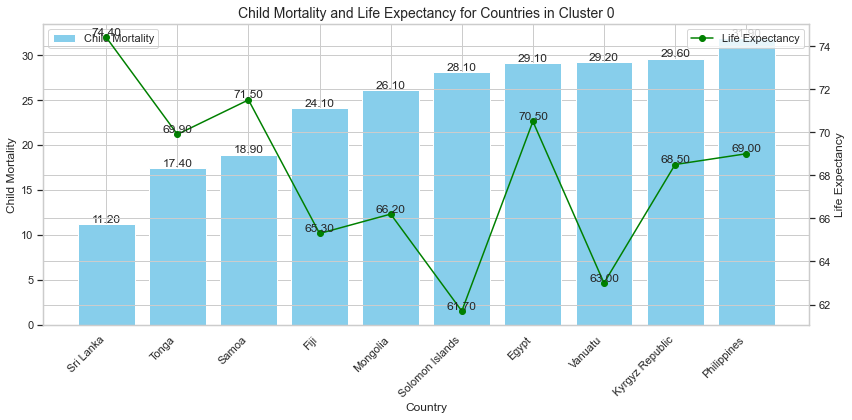

In [72]:
# Filter the DataFrame for cluster 0 and get the 10 countries with highest child mortality
cluster_0 = df[df['cluster'] == 0].nsmallest(10,'child_mort')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjust figure size for better label visibility

# Get the country names in cluster 0 (now sorted)
country_names = cluster_0['country'].tolist()

# Extract the data for child mortality and life expectancy for cluster 0
child_mort = cluster_0['child_mort'].tolist()
life_expec = cluster_0['life_expec'].tolist()

# Plot bars for child mortality
bars1 = ax1.bar(country_names, child_mort, label='Child Mortality', color='skyblue')  # Use country names directly

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Child Mortality and Life Expectancy for Countries in Cluster 0', fontsize=14)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels
ax1.legend(loc='upper left')
ax1.set_ylabel('Child Mortality', fontsize=12)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for life expectancy
line = ax2.plot(country_names, life_expec, color='green', marker='o', label='Life Expectancy')  # Use country names directly

# Set labels for the line chart
ax2.set_ylabel('Life Expectancy', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, life_expec_value in enumerate(life_expec):
    ax2.text(country_names[i], life_expec_value, f'{life_expec_value:.2f}', ha='center', va='bottom')  # Use country names for x-position

# Show plot
plt.tight_layout()
plt.show()

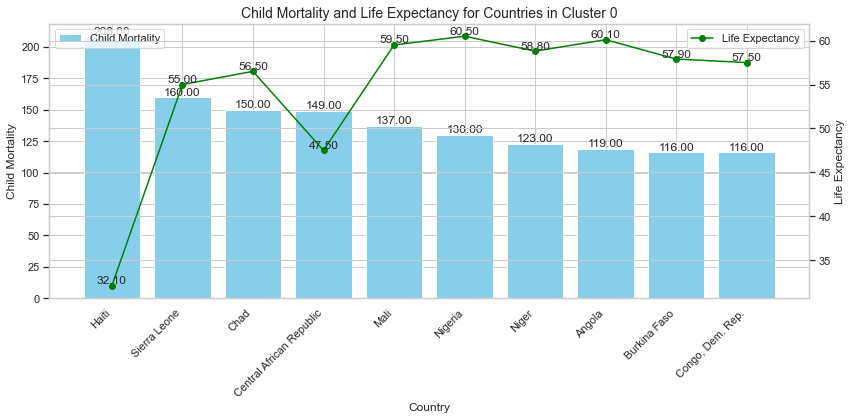

In [73]:
# Filter the DataFrame for cluster 0 and get the 10 countries with highest child mortality
cluster_0 = df[df['cluster'] == 0].nlargest(10,'child_mort')

# Set the style for the plot
sns.set(style="whitegrid")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))  

# Get the country names in cluster 0 (now sorted)
country_names = cluster_0['country'].tolist()

# Extract the data for child mortality and life expectancy for cluster 0
child_mort = cluster_0['child_mort'].tolist()
life_expec = cluster_0['life_expec'].tolist()

# Plot bars for child mortality
bars1 = ax1.bar(country_names, child_mort, label='Child Mortality', color='skyblue')  # Use country names directly

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Child Mortality and Life Expectancy for Countries in Cluster 0', fontsize=14)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Rotate x-axis labels
ax1.legend(loc='upper left')
ax1.set_ylabel('Child Mortality', fontsize=12)

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for life expectancy
line = ax2.plot(country_names, life_expec, color='green', marker='o', label='Life Expectancy')  # Use country names directly

# Set labels for the line chart
ax2.set_ylabel('Life Expectancy', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, life_expec_value in enumerate(life_expec):
    ax2.text(country_names[i], life_expec_value, f'{life_expec_value:.2f}', ha='center', va='bottom')  # Use country names for x-position

# Show plot
plt.tight_layout()
plt.show()

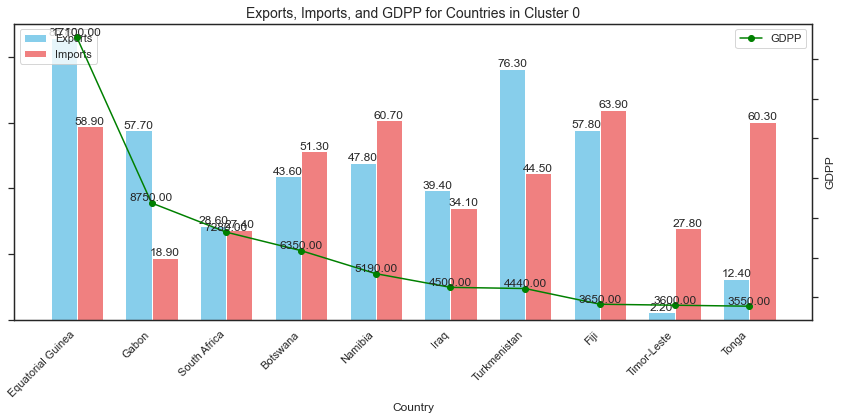

In [74]:
# Filter the DataFrame for cluster 0
cluster_0 = df[df['cluster'] == 0].nlargest(10, 'gdpp')

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 0
country_names = cluster_0['country'].tolist()
x = range(len(country_names))

# Extract data for exports, imports, and gdpp for cluster 0
exports = cluster_0['exports'].tolist()
imports = cluster_0['imports'].tolist()
gdpp = cluster_0['gdpp'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for exports and imports
bars1 = ax1.bar([p - bar_width/2 for p in x], exports, width=bar_width, label='Exports', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], imports, width=bar_width, label='Imports', color='lightcoral')

# Add data labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Exports, Imports, and GDPP for Countries in Cluster 0', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for gdpp
line = ax2.plot(x, gdpp, color='green', marker='o', label='GDPP')

# Set labels for the line chart
ax2.set_ylabel('GDPP', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, gdpp_value in enumerate(gdpp):
    ax2.text(i, gdpp_value, f'{gdpp_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

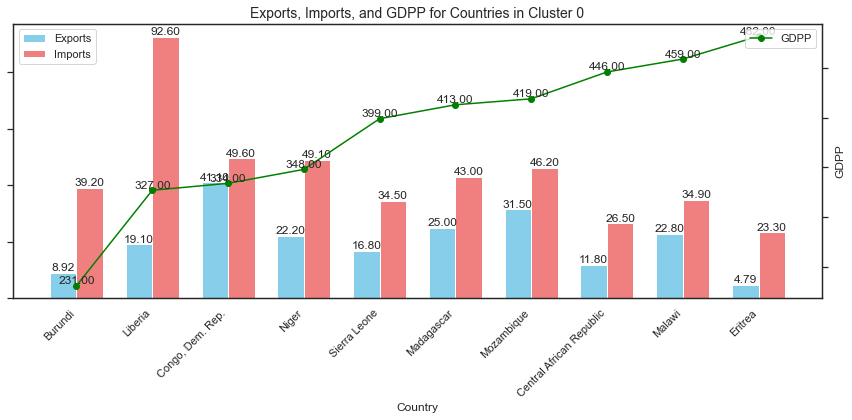

In [75]:
# Filter the DataFrame for cluster 0
cluster_0 = df[df['cluster'] == 0].nsmallest(10, 'gdpp')

# Set the style for the plot (removing grid)
sns.set(style="white")  # Use "white" style to remove grid lines

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 2
country_names = cluster_0['country'].tolist()
x = range(len(country_names))

# Extract data for exports, imports, and gdpp for cluster 0
exports = cluster_0['exports'].tolist()
imports = cluster_0['imports'].tolist()
gdpp = cluster_0['gdpp'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for exports and imports
bars1 = ax1.bar([p - bar_width/2 for p in x], exports, width=bar_width, label='Exports', color='skyblue')
bars2 = ax1.bar([p + bar_width/2 for p in x], imports, width=bar_width, label='Imports', color='lightcoral')

# Add data labels to the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('Exports, Imports, and GDPP for Countries in Cluster 0', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')  # Set country names as x-axis labels
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for gdpp
line = ax2.plot(x, gdpp, color='green', marker='o', label='GDPP')

# Set labels for the line chart
ax2.set_ylabel('GDPP', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, gdpp_value in enumerate(gdpp):
    ax2.text(i, gdpp_value, f'{gdpp_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

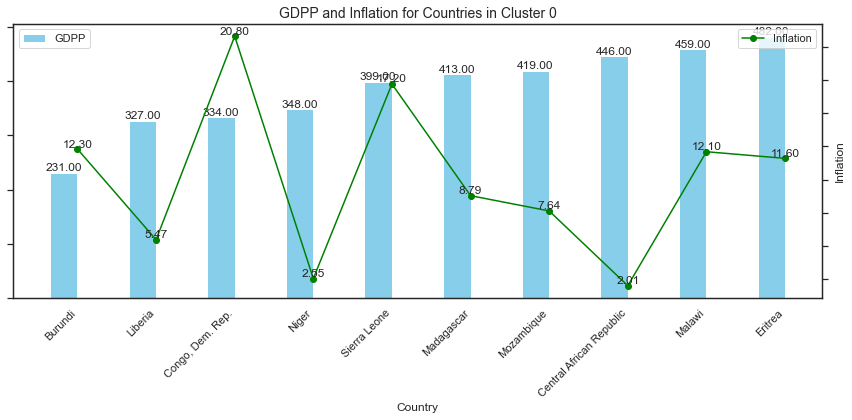

In [76]:
# Filter the DataFrame for cluster 0
cluster_0 = df[df['cluster'] == 0]

# Sort the DataFrame by GDPP in ascending order
cluster_0_sorted = cluster_0.nsmallest(10,'gdpp') # Sort the data

# Set the style for the plot (removing grid)
sns.set(style="white")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 0 (now sorted)
country_names = cluster_0_sorted['country'].tolist()
x = range(len(country_names))

# Extract data for gdpp and inflation for cluster 0 (now sorted)
gdpp = cluster_0_sorted['gdpp'].tolist()
inflation = cluster_0_sorted['inflation'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for gdpp
bars1 = ax1.bar([p - bar_width/2 for p in x], gdpp, width=bar_width, label='GDPP', color='skyblue')

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('GDPP and Inflation for Countries in Cluster 0', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for inflation
line = ax2.plot(x, inflation, color='green', marker='o', label='Inflation')

# Set labels for the line chart
ax2.set_ylabel('Inflation', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, inflation_value in enumerate(inflation):
    ax2.text(i, inflation_value, f'{inflation_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()

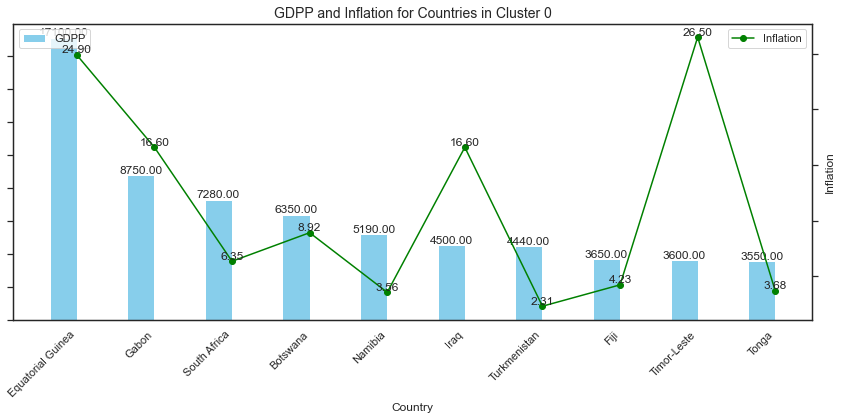

In [77]:
# Filter the DataFrame for cluster 0
cluster_0 = df[df['cluster'] == 0]

# Sort the DataFrame by GDPP in ascending order
cluster_0_sorted = cluster_0.nlargest(10,'gdpp') # Sort the data

# Set the style for the plot (removing grid)
sns.set(style="white")

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Get the country names in cluster 0 (now sorted)
country_names = cluster_0_sorted['country'].tolist()
x = range(len(country_names))

# Extract data for gdpp and inflation for cluster 0 (now sorted)
gdpp = cluster_0_sorted['gdpp'].tolist()
inflation = cluster_0_sorted['inflation'].tolist()

# Bar widths
bar_width = 0.35

# Plot bars for gdpp
bars1 = ax1.bar([p - bar_width/2 for p in x], gdpp, width=bar_width, label='GDPP', color='skyblue')

# Add data labels to the bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title for the bar chart
ax1.set_xlabel('Country', fontsize=12)
ax1.set_title('GDPP and Inflation for Countries in Cluster 0', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(country_names, rotation=45, ha='right')
ax1.legend(loc='upper left')

# Remove y-axis labels for the bar chart
ax1.set_yticklabels([])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()

# Plot the line chart for inflation
line = ax2.plot(x, inflation, color='green', marker='o', label='Inflation')

# Set labels for the line chart
ax2.set_ylabel('Inflation', fontsize=12)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, inflation_value in enumerate(inflation):
    ax2.text(i, inflation_value, f'{inflation_value:.2f}', ha='center', va='bottom')

# Remove y-axis labels for the line chart
ax2.set_yticklabels([])

# Show plot
plt.tight_layout()
plt.show()